13102022

Бруцкий-Стемпковский

v.01

Аугментация изображений с целью увеличения размера исходного датасета.

Импорт библиотек

In [182]:
import cv2
import os
import numpy as np
import requests
import shutil
import matplotlib.pyplot as plt
import random
from PIL import Image

Настроим директорию для открытия и сохранения файлов.

In [183]:
path_tree = "d:\\Works\\Teach_ME_Skills\\Материалы\\ДЗ_Бруцкий-Стемпковский\\DS3onl\\Бруцкий-Стемпковский Николай\\ДЗ_09_Бруцкий-Стемпковский"
path_with_row_images = path_tree + "\\row_images"
path_with_new_images = path_tree + "\\new_images"

Очистим папку с будущими изображениями (если запуск уже не первый).

In [184]:
os.chdir(path_with_new_images)
list_of_new_images = os.listdir()

for im in list_of_new_images:
    os.remove(os.getcwd() + f"\\{im}")

Получим список сырых изображений.

In [185]:
os.chdir(path_with_row_images)

list_of_row_images = os.listdir()
len(list_of_row_images)

200

Подгрузим одно изображение для демнстрации работы функций.

In [186]:
row_image = cv2.imread(list_of_row_images[0])

Реализуем функцию, которая случайным образом вращает изображение. (Случайны здесь центр и угол поворота).
Реализовано с помощью OpenCV

In [187]:
def rotation(url):
    image = cv2.imread(url)
    h, w = image.shape[0:2]
    err_center = random.randint(-3, 3)
    err_rot = random.randint(-30, 30)
    center = (h//2 + int(h*err_center/10), w//2 + int(w*err_center/10))
    M = cv2.getRotationMatrix2D(center, err_rot, 1)
    return cv2.warpAffine(image, M, (w, h))

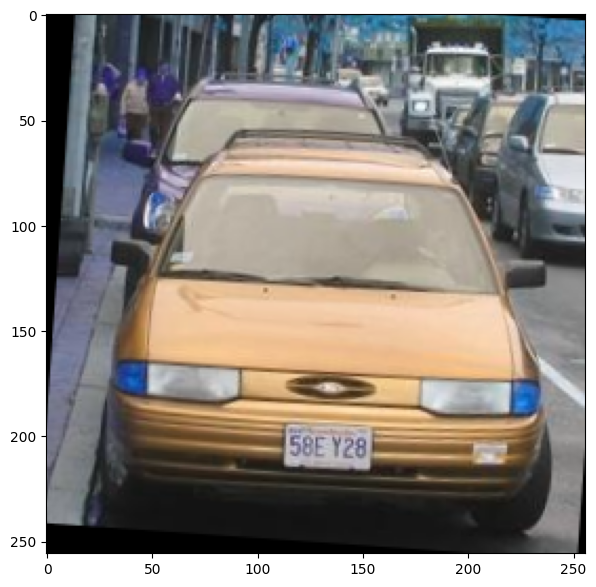

In [188]:
plt.figure(figsize=(7, 7))
plt.imshow(rotation(list_of_row_images[0]));

Реализуем функцию, которая случайным образом расширяет/сжимает изображение. Применим библиотеку Pillow. Для сохранения исходного изображения прменим функцию Cropping

In [189]:
def deformation(url):
    err_w = random.randint(-100, 100)
    err_h = random.randint(-100, 100)

    if err_w > 0:
        err_w_point = random.randint(0, err_w)
    else:
        err_w_point = random.randint(err_w, 0)

    if err_h > 0:
        err_h_point = random.randint(0, err_h)
    else:
        err_h_point = random.randint(err_h, 0)
        
    image = Image.open(url)
    w, h = image.size
    new_image = image.resize((w + err_w, h + err_h)).crop((err_w_point, err_h_point, err_w_point + 256, err_h_point + 256))
    return new_image

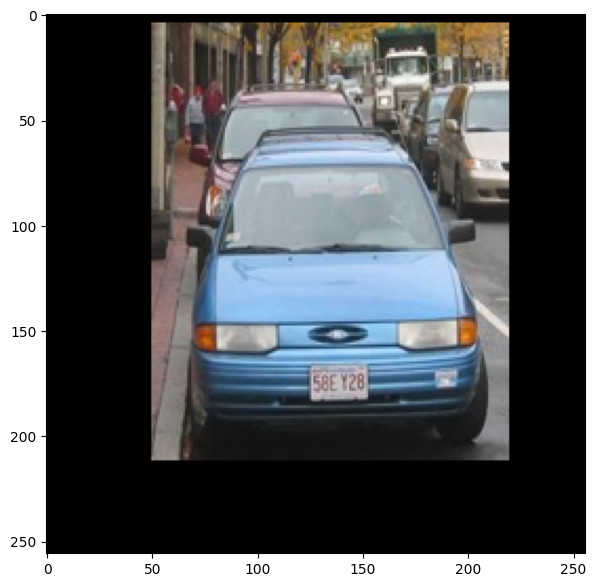

In [190]:
plt.figure(figsize=(7, 7))
plt.imshow(deformation(list_of_row_images[0]));

Реализуем функцию масштабирования изображения, которое является частным случаем деформации изображения, реализованного выше.

In [191]:
def scaling(url):
    err = random.randint(-100, 100)
    err_point = err//2
        
    image = Image.open(url)
    w, h = image.size
    new_image = image.resize((w + err, h + err)).crop((err_point, err_point, err_point + 256, err_point + 256))
    return new_image

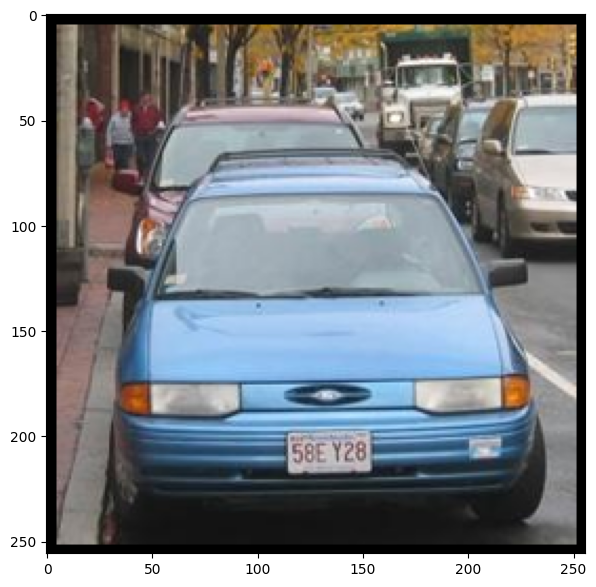

In [192]:
plt.figure(figsize=(7, 7))
plt.imshow(scaling(list_of_row_images[0]));

Последовательно ко всем сырым изображениям применим указанные функции.

In [193]:
def augmentation():
    global path_with_row_images
    global path_with_new_images
    image_counter = 0

    for url in list_of_row_images:
        
        os.chdir(path_with_row_images)

        origin_image = cv2.imread(url)
        rotate_image = rotation(url)
        deform_image = deformation(url)
        scaling_image = scaling(url)

        os.chdir(path_with_new_images)

        cv2.imwrite(f"{image_counter}_origin_im.jpg", origin_image)
        cv2.imwrite(f"{image_counter}_rotate_im.jpg", rotate_image)
        deform_image.save(f"{image_counter}_deform_im.jpg")
        scaling_image.save(f"{image_counter}_scaling_im.jpg")

        image_counter += 1


augmentation();